In [11]:
# import important libraries:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [12]:
# Load the dataset:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the models:
models = {
    "LightGBM": LGBMClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=200, verbose=0, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\python3.7\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost Accuracy: 0.9649


# SHAP Analysis:

In [14]:
#  Let's convert X_test to DataFrame (important for SHAP)
X_test = pd.DataFrame(X_test, columns=X_train.columns)


LightGBM Feature Importance (Top 10):


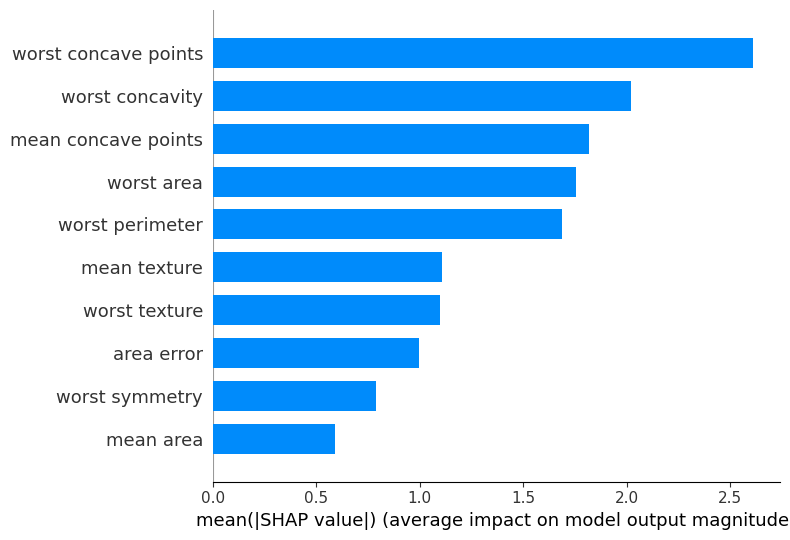

In [15]:
# LightGBM SHAP
explainer_lgb = shap.TreeExplainer(models["LightGBM"])
shap_values_lgb = explainer_lgb(X_test, check_additivity=False)

print("\nLightGBM Feature Importance (Top 10):")
shap.summary_plot(shap_values_lgb, X_test, plot_type="bar", max_display=10)


XGBoost Feature Importance (Top 10):


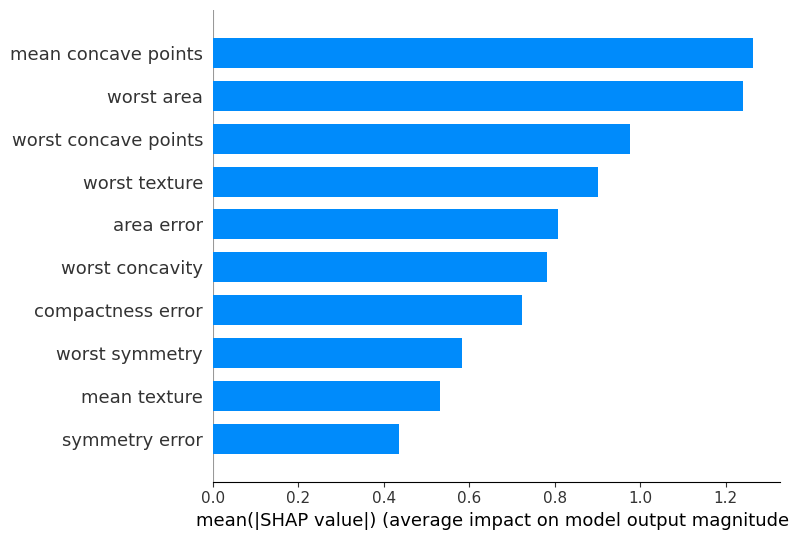

In [16]:
# XGBoost SHAP:
explainer_xgb = shap.TreeExplainer(models["XGBoost"])
shap_values_xgb = explainer_xgb(X_test, check_additivity=False)

print("\nXGBoost Feature Importance (Top 10):")
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", max_display=10)


CatBoost Feature Importance (Top 10):


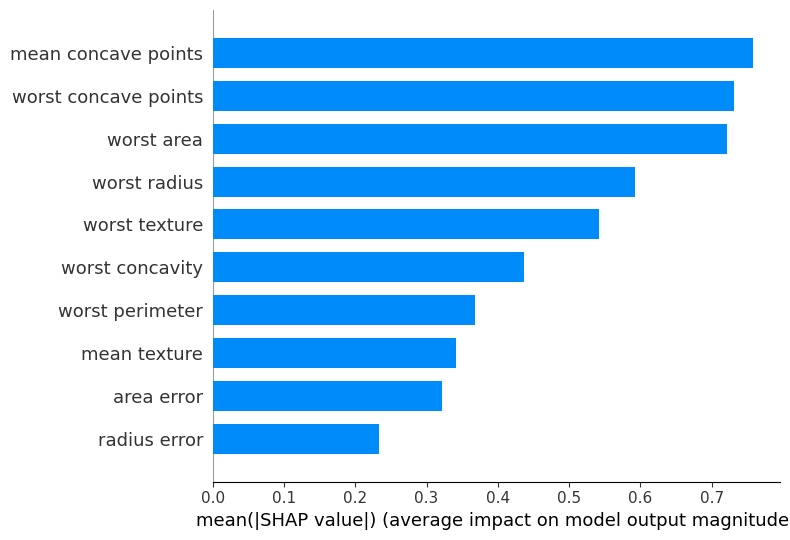

In [17]:
# CatBoost SHAP:
explainer_cat = shap.TreeExplainer(models["CatBoost"])
shap_values_cat = explainer_cat(X_test, check_additivity=False)

print("\nCatBoost Feature Importance (Top 10):")
shap.summary_plot(shap_values_cat, X_test, plot_type="bar", max_display=10)

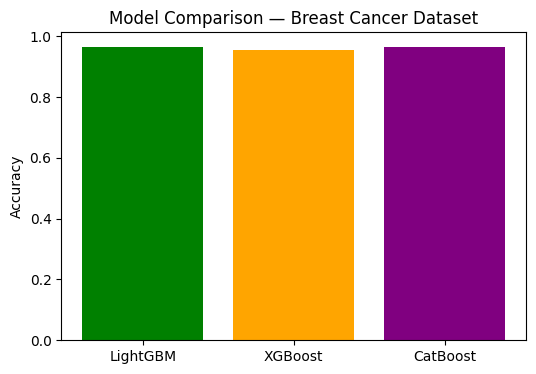

In [18]:
# Model Comaprision Plot:
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color=['green','orange','purple'])
plt.title("Model Comparison — Breast Cancer Dataset")
plt.ylabel("Accuracy")
plt.show()